# [시계열]

- timestamp : 시간 내 특정순간
- period : 1년, 1월간, 주간, 분기등
- interval : 시작 ~ 끝
- elasped(experiment) time : 이동시간, 사용시간 특정시작시간에 대한 상대적 시간 측정값.
- epoch : reference time
- datetime : date와 time
- timedelta : 변화량
- timezone : tzinfo의 구체화
- https://docs.python.org/3/library/datetime.html

In [139]:
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)

In [140]:
pd.options.display.notebook_repr_html = False

In [141]:
%matplotlib inline

In [142]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [143]:
# TIME 관련 IMPORT
import datetime

## 10.1: 시계열 데이터 타입과 도구들

In [7]:
# 현재시간 구하기
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2017, 11, 18, 16, 3, 9, 694185)

In [9]:
now.year, now.month, now.day
now.hour, now.minute, now.second, now.microsecond

(2017, 11, 6)

(21, 23, 38, 981805)

In [23]:
datetime.today() # now랑 비슷하나 timezone에 영향을 받음 local date time
now = datetime.now()
now

datetime.datetime(2017, 11, 6, 21, 26, 23, 451543)

datetime.datetime(2017, 11, 6, 21, 26, 23, 458550)

In [30]:
# timedelta를 직접만듬
delta = datetime(2017,11,6)-datetime(1987,10,25,1,0)
delta
delta.days
delta.seconds
delta.microseconds

datetime.timedelta(10969, 82800)

10969

82800

0

In [32]:
# timedelta 사용
from datetime import timedelta
start = datetime(2011,1,7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [34]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### 10.1.1: 날짜 <--> 문자열 변환

- datetime.strftime('포맷규칙')
- http://strftime.org/

| Code | Meaning                                                                                                                                                                          | Example                  |
|------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------|
| %a   | Weekday as locale’s abbreviated name.                                                                                                                                            | Mon                      |
| %A   | Weekday as locale’s full name.                                                                                                                                                   | Monday                   |
| %w   | Weekday as a decimal number, where 0 is Sunday and 6 is Saturday.                                                                                                                | 1                        |
| %d   | Day of the month as a zero-padded decimal number.                                                                                                                                | 30                       |
| %-d  | Day of the month as a decimal number. (Platform specific)                                                                                                                        | 30                       |
| %b   | Month as locale’s abbreviated name.                                                                                                                                              | Sep                      |
| %B   | Month as locale’s full name.                                                                                                                                                     | September                |
| %m   | Month as a zero-padded decimal number.                                                                                                                                           | 09                       |
| %-m  | Month as a decimal number. (Platform specific)                                                                                                                                   | 9                        |
| %y   | Year without century as a zero-padded decimal number.                                                                                                                            | 13                       |
| %Y   | Year with century as a decimal number.                                                                                                                                           | 2013                     |
| %H   | Hour (24-hour clock) as a zero-padded decimal number.                                                                                                                            | 07                       |
| %-H  | Hour (24-hour clock) as a decimal number. (Platform specific)                                                                                                                    | 7                        |
| %I   | Hour (12-hour clock) as a zero-padded decimal number.                                                                                                                            | 07                       |
| %-I  | Hour (12-hour clock) as a decimal number. (Platform specific)                                                                                                                    | 7                        |
| %p   | Locale’s equivalent of either AM or PM.                                                                                                                                          | AM                       |
| %M   | Minute as a zero-padded decimal number.                                                                                                                                          | 06                       |
| %-M  | Minute as a decimal number. (Platform specific)                                                                                                                                  | 6                        |
| %S   | Second as a zero-padded decimal number.                                                                                                                                          | 05                       |
| %-S  | Second as a decimal number. (Platform specific)                                                                                                                                  | 5                        |
| %f   | Microsecond as a decimal number, zero-padded on the left.                                                                                                                        | 000000                   |
| %z   | UTC offset in the form +HHMM or -HHMM (empty string if the the object is naive).                                                                                                 |                          |
| %Z   | Time zone name (empty string if the object is naive).                                                                                                                            |                          |
| %j   | Day of the year as a zero-padded decimal number.                                                                                                                                 | 273                      |
| %-j  | Day of the year as a decimal number. (Platform specific)                                                                                                                         | 273                      |
| %U   | Week number of the year (Sunday as the first day of the week) as a zero padded decimal number. All days in a new year preceding the first Sunday are considered to be in week 0. | 39                       |
| %W   | Week number of the year (Monday as the first day of the week) as a decimal number. All days in a new year preceding the first Monday are considered to be in week 0.             | 39                       |
| %c   | Locale’s appropriate date and time representation.                                                                                                                               | Mon Sep 30 07:06:05 2013 |
| %x   | Locale’s appropriate date representation.                                                                                                                                        | 09/30/13                 |
| %X   | Locale’s appropriate time representation.                                                                                                                                        | 07:06:05                 |
| %%   | A literal '%' character.                                                                                                                                                         | %                        |

- datetime -> 문자열

In [36]:
stamp = datetime(2017,11,6)
str(stamp)

'2017-11-06 00:00:00'

In [38]:
# 캐스팅
stamp.strftime('%Y-%m-%d')

'2017-11-06'

- 문자열 -> datetime

In [41]:
value = '2017-10-25'
datetime.strptime(value, '%Y-%m-%d').strftime("%m/%d/%Y")

'10/25/2017'

In [17]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs] # list

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

- dateutil 패키지 대부분의 날짜 표현 방식 파싱가능

In [9]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [11]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

- 월이 앞에 오는 경우 dayfirst=True

In [15]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

- pandas.to_datetime() input값에 따라 return 형이 다름
    - 단일날짜 : timestamp형으로 변환
    - 날짜의 배열 : pandas.DatetimeIndex

In [20]:
pd.to_datetime('2011-12-10')
datestrs
pd.to_datetime(datestrs)

Timestamp('2011-12-10 00:00:00')

['7/6/2011', '8/6/2011']

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

- 누락된 날짜 처리

In [22]:
idx = pd.to_datetime(datestrs + [None]) # NaT값이 됨.
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [24]:
idx[2]

NaT

In [26]:
pd.isnull(idx)

array([False, False,  True], dtype=bool)

## 10.2: 시계열 기초

- pandas 시간 데이터 타입
    - timestamp : to_datetime, Timestamp
    - DatetimeIndex : to_datetime, date_range, DatatimeIndex
    - Period : Period
    - PeriodIndex : period_range, PeriodIndex
- 시계열 데이터
    - 파이썬 문자열 또는 datetime 객체로 표현되는 Timestamp 인덱서의 Series 객체
    - datetime 객체의 경우 Timestamp 타입으로 자동변환되나 정렬되지 않음

In [6]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
         datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 1)]
dates
# index 인자로 입력된 datetime 리스트가 자동으로 DatetimeIndex 객체로 변환
ts = Series(np.random.randint(6, size=6), index=dates)
ts # 정렬 X

[datetime.datetime(2011, 1, 2, 0, 0),
 datetime.datetime(2011, 1, 5, 0, 0),
 datetime.datetime(2011, 1, 7, 0, 0),
 datetime.datetime(2011, 1, 8, 0, 0),
 datetime.datetime(2011, 1, 10, 0, 0),
 datetime.datetime(2011, 1, 1, 0, 0)]

2011-01-02    2
2011-01-05    5
2011-01-07    5
2011-01-08    1
2011-01-10    4
2011-01-01    1
dtype: int32

In [7]:
type(ts)
ts.index

pandas.core.series.Series

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-01'],
              dtype='datetime64[ns]', freq=None)

In [8]:
ts
ts[::2]
ts + ts[::2]

2011-01-02    2
2011-01-05    5
2011-01-07    5
2011-01-08    1
2011-01-10    4
2011-01-01    1
dtype: int32

2011-01-02    2
2011-01-07    5
2011-01-10    4
dtype: int32

2011-01-01     NaN
2011-01-02     4.0
2011-01-05     NaN
2011-01-07    10.0
2011-01-08     NaN
2011-01-10     8.0
dtype: float64

- DatetimeIndex 의 스칼라 값은 pandas의 Timestamp 객체

In [9]:
# Index 인자로 날짜 문자열의 리스트를 대입하는 경우
da = ['2017-11-1','2017-11-3','2017-11-6','2017-3-1','2017-2-2']
ts2 = Series(np.random.randn(5), index=da)
ts2
type(ts2.index)

2017-11-1    0.316160
2017-11-3   -1.379198
2017-11-6    0.450554
2017-3-1     0.092673
2017-2-2     1.248133
dtype: float64

pandas.core.indexes.base.Index

- timestamp의 정밀도 : 나노초(ns)

In [10]:
ts.index.dtype
# note: output changed from dtype('datetime64[ns]') to dtype('<M8[ns]')

dtype('<M8[ns]')

In [11]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### 10.2.1: 인덱싱, 선택, 부분선택 
하나의 값 접근하기
- timestamp 객체
- 문자열(시계열데이터의 인덱스가 정렬되어 있지 않으면 Series 객체반환)
- datetime 객체

In [12]:
ts
stamp = ts.index[2]
stamp
ts[stamp]

# Series (정렬되어 있는 경우 scala value값이 나옴)
ts['1/10/2011']
ts['1-7/2011']
ts['20100110']

ts[datetime(2011,1,7)]

2011-01-02    2
2011-01-05    5
2011-01-07    5
2011-01-08    1
2011-01-10    4
2011-01-01    1
dtype: int32

Timestamp('2011-01-07 00:00:00')

5

2011-01-10    4
dtype: int32

2011-01-07    5
dtype: int32

Series([], dtype: int32)

5

- 년 또는 월만으로 해당 기간의 데이터 선택

In [13]:
# date_range 하루씩 Freq : D(기본값) periods 1000개 만큼 만듬.
longer_ts = Series(np.random.randn(1000),
                  index=pd.date_range('11/1/2017', periods=1000))
longer_ts

2017-11-01    0.768101
2017-11-02    1.248804
2017-11-03    0.774191
2017-11-04   -0.319657
2017-11-05   -0.624964
2017-11-06    1.078814
                ...   
2020-07-22    0.168113
2020-07-23    0.241034
2020-07-24   -0.061195
2020-07-25    0.515580
2020-07-26   -0.902991
2020-07-27   -1.786625
Freq: D, Length: 1000, dtype: float64

In [14]:
longer_ts['2017']

2017-11-01    0.768101
2017-11-02    1.248804
2017-11-03    0.774191
2017-11-04   -0.319657
2017-11-05   -0.624964
2017-11-06    1.078814
                ...   
2017-12-26   -0.731743
2017-12-27   -0.787226
2017-12-28   -0.024116
2017-12-29    1.462648
2017-12-30   -1.651593
2017-12-31    0.221755
Freq: D, Length: 61, dtype: float64

In [15]:
longer_ts['2018-12']

2018-12-01    0.778029
2018-12-02    1.094729
2018-12-03    0.039997
2018-12-04   -1.363180
2018-12-05   -1.797116
2018-12-06    0.252152
                ...   
2018-12-26   -1.123359
2018-12-27    0.526940
2018-12-28   -0.020369
2018-12-29    1.249284
2018-12-30    0.241511
2018-12-31    0.098674
Freq: D, Length: 31, dtype: float64

- 날짜로 데이터 자르기
        원본 시계열 데이터에 대한 뷰 생성

In [16]:
ts
ts[datetime(2011,1,7):]

2011-01-02    2
2011-01-05    5
2011-01-07    5
2011-01-08    1
2011-01-10    4
2011-01-01    1
dtype: int32

2011-01-07    5
2011-01-08    1
2011-01-10    4
2011-01-01    1
dtype: int32

In [17]:
ts['1/6/2011':'1/10/2011'] # 뒷 날짜가 포함됨

2011-01-07    5
2011-01-08    1
2011-01-10    4
dtype: int32

- 시계열 데이터는 특정날짜 기준으로 앞, 뒤 버리기.
    - 특정날짜는 포함됨.

In [18]:
ts
ts.truncate(after='1/8/2011')
ts.truncate(before='1/8/2011')

2011-01-02    2
2011-01-05    5
2011-01-07    5
2011-01-08    1
2011-01-10    4
2011-01-01    1
dtype: int32

2011-01-02    2
2011-01-05    5
2011-01-07    5
2011-01-08    1
dtype: int32

2011-01-08    1
2011-01-10    4
2011-01-01    1
dtype: int32

- 시계열 데이터 접근(indexing): 데이터프레임에도 동일 적용.
    - row 인덱스 적용

In [19]:
# freq='W-WED' 매주 수요일로 100개 만든다.
dates = pd.date_range('1/1/2017', periods=100, freq='W-SAT') # 매주 토요일
# dates
long_df = DataFrame(np.random.randint(100, size=(100,4)),
                   index=dates,
                   columns=['Colorado','Texas','New York','Ohio'])
long_df['11-2017']

            Colorado  Texas  New York  Ohio
2017-11-04        35     54        14     7
2017-11-11        49      0         2     1
2017-11-18        23     43        90     7
2017-11-25        51     12        97    40

### 10.2.2: 중복된 색인을 갖는 시계열

In [20]:
dates = pd.DatetimeIndex(['1/1/2000','1/2/2000','1/2/2000','1/2/2000',
                         '1/3/2000'])
dates
dup_ts = Series(np.arange(5), index=dates)
dup_ts

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-02', '2000-01-02',
               '2000-01-03'],
              dtype='datetime64[ns]', freq=None)

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [21]:
# 시계열 데이터 인덱스의 유일여부 확인.
dup_ts.index.is_unique

False

In [22]:
## 시계열 데이터 접근
# 인덱스가 유일 O > 스칼라
# 인덱스가 유일 X > 시계열
dup_ts['1/3/2000'] # 중복데이터가 아닌 경우
dup_ts['1/2/2000'] # 중복데이터인 경우

4

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

- Timestamp 인덱스로 그룹지어서 집계

In [23]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [24]:
grouped.count()
dup_ts.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

5

## 10.3: 날짜범위, 빈도, 이동

날짜범위빈도
- 시간이 불규칙한 시계열 -> 고정빈도 시계열(1일,1주일씩 ...) 로 변환.
    - resamle API가 좀 더 groupby처럼 변경됨
    - asfreq()빈도가 변경된 시게열을 반환
    - DateOffset object
      https://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
    - Frequency Strings(Offset aliase) 

In [26]:
ts

2011-01-02    2
2011-01-05    5
2011-01-07    5
2011-01-08    1
2011-01-10    4
2011-01-01    1
dtype: int32

In [29]:
ts.resample('D') # 객체반환으로 변경됨
ts.resample('D').asfreq() # 일 빈도로 변환시켜 나타냄

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

2011-01-01    1.0
2011-01-02    2.0
2011-01-03    NaN
2011-01-04    NaN
2011-01-05    5.0
2011-01-06    NaN
2011-01-07    5.0
2011-01-08    1.0
2011-01-09    NaN
2011-01-10    4.0
Freq: D, dtype: float64

In [32]:
ts.resample('D').sum()
ts.resample('3D').sum() # 3일에 한번씩 sum(원래 범위를 벗어나지 않음)

2011-01-01    1.0
2011-01-02    2.0
2011-01-03    NaN
2011-01-04    NaN
2011-01-05    5.0
2011-01-06    NaN
2011-01-07    5.0
2011-01-08    1.0
2011-01-09    NaN
2011-01-10    4.0
Freq: D, dtype: float64

2011-01-01    3
2011-01-04    5
2011-01-07    6
2011-01-10    4
Freq: 3D, dtype: int32

### 10.3.1: 날짜 범위 생성하기
- pandas의 date_range() : 특정 빈도에 따라 지정된 길이 만큼 DatetimeIndex를 생성.

In [36]:
index = pd.date_range('4/1/2012', '6/1/2012') # default 빈도는 day!
index 

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [38]:
pd.date_range(start='4/1/2012', periods=20) # 시작일로부터 20일까지

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [40]:
pd.date_range(end='6/1/2012', periods=20) # 끝일로부터 20일전까지

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

- 매월 마지막 영업일 포함

In [44]:
pd.date_range('1/1/2017', '1/1/2018', freq='BMS') # 매월 영업일 시작일
pd.date_range('1/1/2017', '1/1/2018', freq='BM') # 매월 끝 영업일

DatetimeIndex(['2017-01-02', '2017-02-01', '2017-03-01', '2017-04-03',
               '2017-05-01', '2017-06-01', '2017-07-03', '2017-08-01',
               '2017-09-01', '2017-10-02', '2017-11-01', '2017-12-01',
               '2018-01-01'],
              dtype='datetime64[ns]', freq='BMS')

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-28',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-29', '2017-10-31', '2017-11-30', '2017-12-29'],
              dtype='datetime64[ns]', freq='BM')

In [47]:
pd.date_range('11/27/2017 21:02:31', periods=5) # 시,분,초 유지됨

DatetimeIndex(['2017-11-27 21:02:31', '2017-11-28 21:02:31',
               '2017-11-29 21:02:31', '2017-11-30 21:02:31',
               '2017-12-01 21:02:31'],
              dtype='datetime64[ns]', freq='D')

In [49]:
# 자정에 맞춰 타임스탬프 정규화(Normalization)
## start, end 날짜를 자정으로 정규화한 후 date_range 실행
pd.date_range('11/27/2017 21:02:31', periods=5, normalize=True)

DatetimeIndex(['2017-11-27', '2017-11-28', '2017-11-29', '2017-11-30',
               '2017-12-01'],
              dtype='datetime64[ns]', freq='D')

### 10.3.2: 빈도와 날짜 오프셋
- 빈도 = 기본빈도(M(월별),H(시간별) 등) * 배수

In [51]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour # 시간별 빈도 클래스 객체

<Hour>

In [53]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [55]:
# 간단한 문자열의 형태로 사용시
pd.date_range('1/1/2000', '1/3/2000 23:59', freq='5h') # 5시간마다 하나씩

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 05:00:00',
               '2000-01-01 10:00:00', '2000-01-01 15:00:00',
               '2000-01-01 20:00:00', '2000-01-02 01:00:00',
               '2000-01-02 06:00:00', '2000-01-02 11:00:00',
               '2000-01-02 16:00:00', '2000-01-02 21:00:00',
               '2000-01-03 02:00:00', '2000-01-03 07:00:00',
               '2000-01-03 12:00:00', '2000-01-03 17:00:00',
               '2000-01-03 22:00:00'],
              dtype='datetime64[ns]', freq='5H')

In [58]:
# 여러 오프셋은 덧셈으로 합쳐질 수 있음
Hour(3)+Minute(40)

<220 * Minutes>

In [61]:
pd.date_range('1/1/2000', periods=10, freq='2h30min') # 2h30min마다

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 02:30:00',
               '2000-01-01 05:00:00', '2000-01-01 07:30:00',
               '2000-01-01 10:00:00', '2000-01-01 12:30:00',
               '2000-01-01 15:00:00', '2000-01-01 17:30:00',
               '2000-01-01 20:00:00', '2000-01-01 22:30:00'],
              dtype='datetime64[ns]', freq='150T')

- 앵커드 오프셋(Anchored Offset):
    D,B,H,U,M외에 W-MON, Q-JAN과 같이 매주 월요일, 분기 2월부터 시작해서 다음 1월 끝, 영업일 기준시 쓰는 오프셋

#### 월별 주차

In [66]:
# 매월 셋째주 금요일
rng = pd.date_range('1/1/2017','12/1/2017', freq='WOM-3FRI')
list(rng)
pd.date_range('1/1/2017','12/1/2017', freq='3W-FRI') # 매주 3주기간으로 금요일 뽑기.
pd.date_range('2017-09-13', periods=10, freq='3W')
# 9월 13일이 들어있는 일요일에서 3주간격으로 10개의 날짜를 뽑기.

[Timestamp('2017-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2017-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2017-03-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2017-04-21 00:00:00', freq='WOM-3FRI'),
 Timestamp('2017-05-19 00:00:00', freq='WOM-3FRI'),
 Timestamp('2017-06-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2017-07-21 00:00:00', freq='WOM-3FRI'),
 Timestamp('2017-08-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2017-09-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2017-10-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2017-11-17 00:00:00', freq='WOM-3FRI')]

DatetimeIndex(['2017-01-06', '2017-01-27', '2017-02-17', '2017-03-10',
               '2017-03-31', '2017-04-21', '2017-05-12', '2017-06-02',
               '2017-06-23', '2017-07-14', '2017-08-04', '2017-08-25',
               '2017-09-15', '2017-10-06', '2017-10-27', '2017-11-17'],
              dtype='datetime64[ns]', freq='3W-FRI')

DatetimeIndex(['2017-09-17', '2017-10-08', '2017-10-29', '2017-11-19',
               '2017-12-10', '2017-12-31', '2018-01-21', '2018-02-11',
               '2018-03-04', '2018-03-25'],
              dtype='datetime64[ns]', freq='3W-SUN')

### 10.3.3: 데이터 시프트(Shifting: Leading and Lagging)
- 시프트 : 데이터를 시간 축에서 앞이나 뒤로 이동하는 것.

In [69]:
ts = Series(np.random.randn(4),
           index=pd.date_range('9/1/2017', periods=4, freq='M'))
ts

2017-09-30    0.745231
2017-10-31   -2.302692
2017-11-30    1.072055
2017-12-31    0.218818
Freq: M, dtype: float64

- 느슨한 시프트 
    - 시간인덱스는 그대로, 데이터만 이동
    - 데이터가 버려질 수 있음.

In [71]:
ts
ts.shift(2)
ts.shift(-2)

2017-09-30    0.745231
2017-10-31   -2.302692
2017-11-30    1.072055
2017-12-31    0.218818
Freq: M, dtype: float64

2017-09-30         NaN
2017-10-31         NaN
2017-11-30    0.745231
2017-12-31   -2.302692
Freq: M, dtype: float64

2017-09-30    1.072055
2017-10-31    0.218818
2017-11-30         NaN
2017-12-31         NaN
Freq: M, dtype: float64

- 시계열에서 퍼센트 계산

In [81]:
# 이전값보다 얼마나 늘었나 증가분 구하기
ts.shift(1)
ts / ts.shift(1) - 1

2017-09-30         NaN
2017-10-31    0.745231
2017-11-30   -2.302692
2017-12-31    1.072055
Freq: M, dtype: float64

2017-09-30         NaN
2017-10-31   -4.089904
2017-11-30   -1.465566
2017-12-31   -0.795890
Freq: M, dtype: float64

In [82]:
ts.pct_change() # 퍼센트 증가분!
ts.pct_change(2) # 2칸 시프트

2017-09-30         NaN
2017-10-31   -4.089904
2017-11-30   -1.465566
2017-12-31   -0.795890
Freq: M, dtype: float64

2017-09-30         NaN
2017-10-31         NaN
2017-11-30    0.438555
2017-12-31   -1.095027
Freq: M, dtype: float64

- freq 인자에 같은 빈도를 주면 인덱스가 변경됨
but 데이터 개수는 변경되지 않음

In [84]:
ts
ts.shift(2, freq='M') # 월말

2017-09-30    0.745231
2017-10-31   -2.302692
2017-11-30    1.072055
2017-12-31    0.218818
Freq: M, dtype: float64

2017-11-30    0.745231
2017-12-31   -2.302692
2018-01-31    1.072055
2018-02-28    0.218818
Freq: M, dtype: float64

In [87]:
ts.shift(3, freq='D') # 3day 뒤 index만 바뀜
ts.shift(1, freq='3D') # 위와 같은 결과.

2017-10-03    0.745231
2017-11-03   -2.302692
2017-12-03    1.072055
2018-01-03    0.218818
dtype: float64

2017-10-03    0.745231
2017-11-03   -2.302692
2017-12-03    1.072055
2018-01-03    0.218818
dtype: float64

In [90]:
ts.shift(1, freq='90T') # 90분 = 1시간 30분(1시30분?)

2017-09-30 01:30:00    0.745231
2017-10-31 01:30:00   -2.302692
2017-11-30 01:30:00    1.072055
2017-12-31 01:30:00    0.218818
Freq: M, dtype: float64

#### 오프셋만큼 날짜 시프트하기.

In [92]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011,11,17)
now + 3 * Day() # 자동 형변환.

Timestamp('2011-11-20 00:00:00')

In [94]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [96]:
now + MonthEnd(2) # 다음달의 마지막날

Timestamp('2011-12-31 00:00:00')

- rollforward(), rollback() : 메서드를 활용해 명시적으로 각각 날짜를 앞으로 밀거나 당길수 있음.

In [98]:
offset = MonthEnd()
offset.rollforward(now) # 그 달의 마지막날로! (now + MonthEnd())

Timestamp('2011-11-30 00:00:00')

In [101]:
offset.rollback(now) # 그 전달의 마지막날 (now - MonthEnd())

Timestamp('2011-10-31 00:00:00')

In [104]:
# 4일에 한번씩 20개 날짜.
ts = Series(np.random.randn(20),
           index=pd.date_range('11/27/2017', periods=20, freq='4D'))
ts
# groupby에 함수를 주면 index에 적용됨
# 말일날짜 기준으로 평균을 모음.
ts.groupby(offset.rollforward).mean()

2017-11-27   -1.020200
2017-12-01    0.544978
2017-12-05    0.654146
2017-12-09    2.301466
2017-12-13   -0.312340
2017-12-17   -0.017415
                ...   
2018-01-22    0.671058
2018-01-26    0.131795
2018-01-30    1.051027
2018-02-03    0.152935
2018-02-07    0.196589
2018-02-11    0.482493
Freq: 4D, Length: 20, dtype: float64

2017-11-30   -1.020200
2017-12-31    0.330114
2018-01-31    0.464529
2018-02-28    0.277339
dtype: float64

In [111]:
# ts.resample('M', how='mean') # 위와 같은 결과. (예전방식)
ts.resample('M').mean() # 위와 같은 결과.

2017-11-30   -1.020200
2017-12-31    0.330114
2018-01-31    0.464529
2018-02-28    0.277339
Freq: M, dtype: float64

## 10.4: 시간대 다루기(Time Zone Handling)
시간대
- DST(일광절약시간, Day Saving Time 서머타임)
- UTC(국제표준시, Coordinate Universal Time)
    - pytz 패키지 : Olson 시간대 데이터베이스를 기준으로 한 역사적인 시간대와 현대적인 시간대를 모두 망라하고 있는 라이브러리

In [6]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [7]:
[x for x in pytz.common_timezones if x.startswith('Asia')][:10]
[x for x in pytz.common_timezones if x.endswith('Seoul')]

['Asia/Aden',
 'Asia/Almaty',
 'Asia/Amman',
 'Asia/Anadyr',
 'Asia/Aqtau',
 'Asia/Aqtobe',
 'Asia/Ashgabat',
 'Asia/Atyrau',
 'Asia/Baghdad',
 'Asia/Bahrain']

['Asia/Seoul']

In [8]:
# TimeZone 객체 생성 : 시간대 객체 생성
tz = pytz.timezone('US/Eastern')
tz

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

### 10.4.1: 지역화와 변환
- 명시하지 않은 시간대는 None

In [9]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = Series(np.random.randn(len(rng)), index=rng)

In [10]:
print(ts.index.tz)
# print(ts)

None


- 시간대 지정하여 날짜범위 생성

In [11]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

- 지정한 시간대로 시계열 변경
    - 시간대가 없는 시계열 : tz_localize()
    - 시간대가 있는 시계열 : tz_convert()
          시간대가 다른 시계열로 변환
          tz_localize(), tz_convert() : DatatimeIndex의 인스턴스 메서드

In [12]:
ts
ts_utc = ts.tz_localize('UTC') # 현지화함
ts_utc # +00:00 타임존이 들어감.

2012-03-09 09:30:00   -0.204708
2012-03-10 09:30:00    0.478943
2012-03-11 09:30:00   -0.519439
2012-03-12 09:30:00   -0.555730
2012-03-13 09:30:00    1.965781
2012-03-14 09:30:00    1.393406
Freq: D, dtype: float64

2012-03-09 09:30:00+00:00   -0.204708
2012-03-10 09:30:00+00:00    0.478943
2012-03-11 09:30:00+00:00   -0.519439
2012-03-12 09:30:00+00:00   -0.555730
2012-03-13 09:30:00+00:00    1.965781
2012-03-14 09:30:00+00:00    1.393406
Freq: D, dtype: float64

In [13]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [14]:
ts_utc.tz_convert('US/Eastern') # 미동부 표준시간으로 변경, 표준보다 5시간 느림

2012-03-09 04:30:00-05:00   -0.204708
2012-03-10 04:30:00-05:00    0.478943
2012-03-11 05:30:00-04:00   -0.519439
2012-03-12 05:30:00-04:00   -0.555730
2012-03-13 05:30:00-04:00    1.965781
2012-03-14 05:30:00-04:00    1.393406
Freq: D, dtype: float64

In [15]:
# ts 타임존이 없는 데이터
ts
ts_eastern = ts.tz_localize('US/Eastern')
ts_eastern.tz_convert('UTC')

2012-03-09 09:30:00   -0.204708
2012-03-10 09:30:00    0.478943
2012-03-11 09:30:00   -0.519439
2012-03-12 09:30:00   -0.555730
2012-03-13 09:30:00    1.965781
2012-03-14 09:30:00    1.393406
Freq: D, dtype: float64

2012-03-09 14:30:00+00:00   -0.204708
2012-03-10 14:30:00+00:00    0.478943
2012-03-11 13:30:00+00:00   -0.519439
2012-03-12 13:30:00+00:00   -0.555730
2012-03-13 13:30:00+00:00    1.965781
2012-03-14 13:30:00+00:00    1.393406
Freq: D, dtype: float64

In [16]:
# 베를린 시간으로 변환 
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.204708
2012-03-10 15:30:00+01:00    0.478943
2012-03-11 14:30:00+01:00   -0.519439
2012-03-12 14:30:00+01:00   -0.555730
2012-03-13 14:30:00+01:00    1.965781
2012-03-14 14:30:00+01:00    1.393406
Freq: D, dtype: float64

In [17]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### 10.4.2: 시간대 고려해 TimeStamp 객체 다루기

In [23]:
stamp = pd.Timestamp('2011-03-02 04:00')
stamp_utc = stamp.tz_localize('utc'); stamp_utc
stamp_utc.tz_convert('US/Eastern')
stamp_utc.tz_convert('Asia/Seoul')

Timestamp('2011-03-02 04:00:00+0000', tz='UTC')

Timestamp('2011-03-01 23:00:00-0500', tz='US/Eastern')

Timestamp('2011-03-02 13:00:00+0900', tz='Asia/Seoul')

- timezone 객체 생성시 시간대 지정

In [26]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

- UNIX epoch(1970년1월1일)부터 해당시간까지의 나노초
    - 시간대 변환해도 유지됨
    - 일종의 절대시간

In [28]:
stamp_utc.value

1299038400000000000

In [30]:
stamp_utc.tz_convert('US/Eastern').value

1299038400000000000

- 일광절약시간제 고려한 시간계산
    - 일광절약시간제
    - DST 전환시점 고려

In [32]:
# 30 minutes before DST transition
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [34]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [36]:
# 90 minute before DST transition
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [38]:
# 일광절약시간대가 해지되는 시간
stamp + 2 * Hour() # 한시간이 늦춰짐 일광절약시간대!

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### 10.4.3: 다른 시간대 간의 연산

In [41]:
# 다른 시간대를 갖는 두 시계열이 하나로 합쳐지면 UTC 시간!
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = Series(np.random.randn(len(rng)), index=rng)

In [43]:
ts[:7]

2012-03-07 09:30:00   -2.001637
2012-03-08 09:30:00   -0.371843
2012-03-09 09:30:00    1.669025
2012-03-12 09:30:00   -0.438570
2012-03-13 09:30:00   -0.539741
2012-03-14 09:30:00    0.476985
2012-03-15 09:30:00    3.248944
Freq: B, dtype: float64

In [47]:
ts1 = ts[:7].tz_localize('Europe/London'); ts1.index
ts2 = ts1[2:].tz_convert('Europe/Moscow'); ts2.index
result = ts1 + ts2 # 표준시로 변환해서 연산됨
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, Europe/London]', freq='B')

DatetimeIndex(['2012-03-09 13:30:00+04:00', '2012-03-12 13:30:00+04:00',
               '2012-03-13 13:30:00+04:00', '2012-03-14 13:30:00+04:00',
               '2012-03-15 13:30:00+04:00'],
              dtype='datetime64[ns, Europe/Moscow]', freq='B')

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [49]:
ts1
ts2
result

2012-03-07 09:30:00+00:00   -2.001637
2012-03-08 09:30:00+00:00   -0.371843
2012-03-09 09:30:00+00:00    1.669025
2012-03-12 09:30:00+00:00   -0.438570
2012-03-13 09:30:00+00:00   -0.539741
2012-03-14 09:30:00+00:00    0.476985
2012-03-15 09:30:00+00:00    3.248944
Freq: B, dtype: float64

2012-03-09 13:30:00+04:00    1.669025
2012-03-12 13:30:00+04:00   -0.438570
2012-03-13 13:30:00+04:00   -0.539741
2012-03-14 13:30:00+04:00    0.476985
2012-03-15 13:30:00+04:00    3.248944
Freq: B, dtype: float64

2012-03-07 09:30:00+00:00         NaN
2012-03-08 09:30:00+00:00         NaN
2012-03-09 09:30:00+00:00    3.338051
2012-03-12 09:30:00+00:00   -0.877139
2012-03-13 09:30:00+00:00   -1.079483
2012-03-14 09:30:00+00:00    0.953970
2012-03-15 09:30:00+00:00    6.497888
Freq: B, dtype: float64

## 10.5: 기간과 기간연산(Periods and Period Arithmethic)
- 몇 일, 개월, 분기, 해 : Period 클래스로 표현가능.

In [8]:
p = pd.Period(2017, freq='A-DEC') # 1년 데이터 annual
p

Period('2017', 'A-DEC')

In [11]:
p+5
p-2

Period('2022', 'A-DEC')

Period('2015', 'A-DEC')

In [14]:
pd.Period('2013', freq='A-DEC')-p # 두 기간의 차(년차)

-4

- pandas.period_range() : PeriodIndex 생성(일반적인 기간 범위)

In [16]:
# 월말 단위로.
rng = pd.period_range('1/1/2017','11/30/2017', freq='M')
rng

PeriodIndex(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08', '2017-09', '2017-10', '2017-11'],
            dtype='period[M]', freq='M')

In [19]:
Series(np.random.randn(11),index=rng)

2017-01   -0.371843
2017-02    1.669025
2017-03   -0.438570
2017-04   -0.539741
2017-05    0.476985
2017-06    3.248944
2017-07   -1.021228
2017-08   -0.577087
2017-09    0.124121
2017-10    0.302614
2017-11    0.523772
Freq: M, dtype: float64

In [21]:
# Q-DEC 12월을 끝으로 하는 분기
values = ['2011Q3','2012Q2','2013Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2011Q3', '2012Q2', '2013Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### 10.5.1: Period의 빈도변환(Period Frequency Conversion)
- Period.asfreq() 메서드를 통해 다른 빈도로 변환.
- 상위단계기간 => 하위단계기간

In [24]:
p = pd.Period('2017',freq='A-DEC') # 1년단위
p.asfreq('M', how='start') # 월단위 start일자로 바꿈
p.asfreq('M', how='end') # 월단위 end일자로 바꿈
p.asfreq('D', how='start') # 일단위 start일자로 바꿈
p.asfreq('D', how='end') # 일단위 end일자로 바꿈
p.asfreq('H', how='start') # 시간단위 start일자로 바꿈
p.asfreq('H', how='end') # 시간단위 end일자로 바꿈

Period('2017-01', 'M')

Period('2017-12', 'M')

Period('2017-01-01', 'D')

Period('2017-12-31', 'D')

Period('2017-01-01 00:00', 'H')

Period('2017-12-31 23:00', 'H')

In [26]:
p = pd.Period('2017', freq='A-JUN') # JUN 1년단위!(2016-07~2017-06)
p.asfreq('M', 'start')
p.asfreq('M', 'end')

Period('2016-07', 'M')

Period('2017-06', 'M')

- 하위단계기간 => 상위단계기간(큰 범위로)
- 상위기간은 하위기간이 어디 속했는지에 따라 결정

In [30]:
p = pd.Period('Aug-2007', 'M');p
p.asfreq('A-JUN') # JUN 7월1일부터 12월31일 : 2007-07~2008-06 기간에 속하므로!(2008년임)

Period('2007-08', 'M')

Period('2008', 'A-JUN')

- PeriodIndex 객체 다루기

In [33]:
# start, end, period 
rng = pd.period_range('2006', '2009', freq='A-DEC') 
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2006   -2.370232
2007   -1.860761
2008   -0.860757
2009    0.560145
Freq: A-DEC, dtype: float64

In [35]:
# 년간데이터를 월간데이터로 변경
ts.asfreq('M', how='start')

2006-01   -2.370232
2007-01   -1.860761
2008-01   -0.860757
2009-01    0.560145
Freq: M, dtype: float64

In [38]:
ts.asfreq('B', how='start') # 날짜까지 출력됨(비즈니스 데이)

2006-01-02   -2.370232
2007-01-01   -1.860761
2008-01-01   -0.860757
2009-01-01    0.560145
Freq: B, dtype: float64

### 10.5.2: 분기빈도(Quarterly period frequencies)
- 회계연도의 끝에 따라 의미가 달라짐.
- 12가지의 분기빈도 : Q-JAN  ~ Q-DEC

In [8]:
p = pd.Period('2017Q3', freq='Q-DEC') # 3달치
p
p2 = pd.Period('2017Q3', freq='q-jan')
p2

Period('2017Q3', 'Q-DEC')

Period('2017Q3', 'Q-JAN')

In [13]:
p.asfreq('D', 'start')
p2.asfreq('D', 'S') # 's' (2016)FMA/MJJ/ASO/ND|J(2017) 
# 2017년 1월에 끝나는 분기 2016 2월부터 시작 3개월씩

Period('2017-07-01', 'D')

Period('2016-08-01', 'D')

In [16]:
p.asfreq('D','end')
p2.asfreq('D','e') # 3분기 마지막날!(2016년 A|S|O<10월>)

Period('2017-09-30', 'D')

Period('2016-10-31', 'D')

- 2017년 3분기영업 마감일 오후4시

In [22]:
p
p.asfreq('B','e') # 영업일 마지막 마감일
(p.asfreq('B','e')-1).asfreq('T','s') # 분으로 변환(도메인-1)

Period('2017Q3', 'Q-DEC')

Period('2017-09-29', 'B')

Period('2017-09-28 00:00', 'T')

In [35]:
p4pm = (p.asfreq('B','e')-1).asfreq('T','s') + 16 * 60
p4pm

Period('2017-09-28 16:00', 'T')

In [37]:
p4pm.to_timestamp()

Timestamp('2017-09-28 16:00:00')

- pandas.period_range()를 이용한 분기범위 만들기.

In [41]:
rng = pd.period_range('2016Q3','2017Q4', freq='q-jan') # 분기 끝이 1월
rng
ts = Series(np.arange(len(rng)), index=rng)
ts

PeriodIndex(['2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4'], dtype='period[Q-JAN]', freq='Q-JAN')

2016Q3    0
2016Q4    1
2017Q1    2
2017Q2    3
2017Q3    4
2017Q4    5
Freq: Q-JAN, dtype: int32

In [46]:
# new_rng = rng.asfreq('B','e').asfreq('T','s') + 16 * 60
new_rng = (rng.asfreq('B','e')-1).asfreq('T','s') + 16 * 60
new_rng
ts.index = new_rng.to_timestamp()
ts

PeriodIndex(['2015-10-29 16:00', '2016-01-28 16:00', '2016-04-28 16:00',
             '2016-07-28 16:00', '2016-10-28 16:00', '2017-01-30 16:00'],
            dtype='period[T]', freq='T')

2015-10-29 16:00:00    0
2016-01-28 16:00:00    1
2016-04-28 16:00:00    2
2016-07-28 16:00:00    3
2016-10-28 16:00:00    4
2017-01-30 16:00:00    5
dtype: int32

### 10.5.3: 타임스탬프와 기간 서로 변환하기(Converting Timestamps to Periods[and back])
- Timestamp <-> Period
- to_period() <-> to_timestamp()

In [50]:
rng = pd.date_range('1/1/2000',periods=3, freq='M')
rng
ts = Series(randn(3), index=rng)
ts

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='datetime64[ns]', freq='M')

2000-01-31    0.092908
2000-02-29    0.281746
2000-03-31    0.769023
Freq: M, dtype: float64

In [52]:
# to_period() 에 의해 변환되는 빈도(freq) 추정됨
pts = ts.to_period()
pts

2000-01    0.092908
2000-02    0.281746
2000-03    0.769023
Freq: M, dtype: float64

In [55]:
# 빈도를 지정할 수 있음(중복된 인덱스가 나올수 있음)
rng = pd.date_range('1/29/2000', periods=6, freq='D')
rng
ts2 = Series(randn(6), index=rng)
ts2

DatetimeIndex(['2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03'],
              dtype='datetime64[ns]', freq='D')

2000-01-29    0.886429
2000-01-30   -2.001637
2000-01-31   -0.371843
2000-02-01    1.669025
2000-02-02   -0.438570
2000-02-03   -0.539741
Freq: D, dtype: float64

In [57]:
pts
pts.to_timestamp(how='end')

2000-01    0.092908
2000-02    0.281746
2000-03    0.769023
Freq: M, dtype: float64

2000-01-31    0.092908
2000-02-29    0.281746
2000-03-31    0.769023
Freq: M, dtype: float64

In [61]:
ts2.to_period('M')
ts2.to_period('M').to_timestamp(how='end')

2000-01    0.886429
2000-01   -2.001637
2000-01   -0.371843
2000-02    1.669025
2000-02   -0.438570
2000-02   -0.539741
Freq: M, dtype: float64

2000-01-31    0.886429
2000-01-31   -2.001637
2000-01-31   -0.371843
2000-02-29    1.669025
2000-02-29   -0.438570
2000-02-29   -0.539741
dtype: float64

### 10.5.4: 배열을 이용해 PeriodIndex 생성하기(Creating a PeriodIndex from arrays)
- 미시경제학 연도와 분기.

In [63]:
data = pd.read_csv('./ch08/macrodata.csv')
data.head(10)

     year  quarter   realgdp  realcons  realinv  realgovt  realdpi    cpi  \
0  1959.0      1.0  2710.349    1707.4  286.898   470.045   1886.9  28.98   
1  1959.0      2.0  2778.801    1733.7  310.859   481.301   1919.7  29.15   
2  1959.0      3.0  2775.488    1751.8  289.226   491.260   1916.4  29.35   
3  1959.0      4.0  2785.204    1753.7  299.356   484.052   1931.3  29.37   
4  1960.0      1.0  2847.699    1770.5  331.722   462.199   1955.5  29.54   
5  1960.0      2.0  2834.390    1792.9  298.152   460.400   1966.1  29.55   
6  1960.0      3.0  2839.022    1785.8  296.375   474.676   1967.8  29.75   
7  1960.0      4.0  2802.616    1788.2  259.764   476.434   1966.6  29.84   
8  1961.0      1.0  2819.264    1787.7  266.405   475.854   1984.5  29.81   
9  1961.0      2.0  2872.005    1814.3  286.246   480.328   2014.4  29.92   

      m1  tbilrate  unemp      pop  infl  realint  
0  139.7      2.82    5.8  177.146  0.00     0.00  
1  141.7      3.08    5.1  177.830  2.34     0.7

In [66]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [71]:
data[:5]
# PeriodIndex 에 빈도값과 함께 전달하여 dataframe에 인덱스로 전달.
data.index = index # index를 시계열 데이터로 만듬.
data.infl

          year  quarter   realgdp  realcons  realinv  realgovt  realdpi  \
1959Q1  1959.0      1.0  2710.349    1707.4  286.898   470.045   1886.9   
1959Q2  1959.0      2.0  2778.801    1733.7  310.859   481.301   1919.7   
1959Q3  1959.0      3.0  2775.488    1751.8  289.226   491.260   1916.4   
1959Q4  1959.0      4.0  2785.204    1753.7  299.356   484.052   1931.3   
1960Q1  1960.0      1.0  2847.699    1770.5  331.722   462.199   1955.5   

          cpi     m1  tbilrate  unemp      pop  infl  realint  
1959Q1  28.98  139.7      2.82    5.8  177.146  0.00     0.00  
1959Q2  29.15  141.7      3.08    5.1  177.830  2.34     0.74  
1959Q3  29.35  140.5      3.82    5.3  178.657  2.74     1.09  
1959Q4  29.37  140.0      4.33    5.6  179.386  0.27     4.06  
1960Q1  29.54  139.6      3.50    5.2  180.007  2.31     1.19  

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
          ... 
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## 10.6: 리샘플링과 빈도변환(Resampling and Frequency Conversion)

- Resampling : 시계열의 빈도를 변경하는 작업.
    - Downsampling(다운샘플링): 상위빈도 > 하위빈도순을 집계.
        - 표본을 천천히 뽑겠다.
        - 그룹집계
    - Upsampling(업샘플링) : 하위빈도 > 상위빈도 순으로 집계.
        - 보간(interpolation)
    - sidesampling(사이드샘플링) : 같은분기끼리 등.
- Resampling Method
    - Series.resample()
    - DataFrame.resample()
    - DataFrameGroupby.resample()

In [79]:
rng = pd.date_range('1/1/2000',periods=100, freq='D')
ts = Series(randn(len(rng)), index=rng)
ts
ts.resample('M').mean() # Groupby 

2000-01-01   -2.949343
2000-01-02    0.634634
2000-01-03    0.124157
2000-01-04    1.297622
2000-01-05   -1.686933
2000-01-06    1.089539
                ...   
2000-04-04   -0.902148
2000-04-05    0.752769
2000-04-06   -0.490509
2000-04-07   -0.524672
2000-04-08   -0.699196
2000-04-09    0.352361
Freq: D, Length: 100, dtype: float64

2000-01-31   -0.065619
2000-02-29    0.116391
2000-03-31   -0.044008
2000-04-30   -0.162582
Freq: M, dtype: float64

In [84]:
# ts.resample('M',  how='mean', kind='period') # 예전방법.
ts.resample('M', kind='period').mean() # 최근방법

2000-01   -0.065619
2000-02    0.116391
2000-03   -0.044008
2000-04   -0.162582
Freq: M, dtype: float64

[resampleing 메서드 인자]
- freq: 리샘플링 빈도 문자열 or DataOffset(ex. 'M','5min',Second(15))
- how: mean, ohlc, np.max 같은 집계된 함수나 함수의 배열(default: mean)
- fill_method=None : 업샘플링시 사용할 보간방법(ffill, bfill)
- closed='right': 다운샘플링시 간격을 어느쪽 포함시킬지 판단('right','left')
- label='right': 다운 샘플링시 집계된 결과의 라벨
- loffset=None: s나뉜 그룹의 라벨에 맞추기 위한 오프셋 ('-1s/Second(-1): 집계된 라벨을 1초앞으로 당김)
- limit=None : 보간법 이용시 보간을 적용할 최대기간.
- kind : 기간('period') 혹은 timestamp 별로 집계할 것인지 구분.
- convention=None : 기간을 리샘플링할대 하위 빈도 기간에서 상위 빈도로 변환할때의 방식(start, end[default])

### 10.6.1: 다운샘플링(Downsampling)
- 샘플링(표본추출) 비율을 낮추는 작업
- 고려사항
    - 간격의 양끝 중 포함시킬쪽 판단 : closed='right?left'
    - 집계하려는 구간의 레이블 간격의 시작으로 할지 끝으로 할지 판단 : label    

In [86]:
rng = pd.date_range('1/1/2000', periods=12, freq='T')
ts = Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [88]:
ts.resample('5min').sum() # 1분을 5분단위로 00, 05를 포함할지 안할지 : 00~04까지

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [90]:
# close 포함
ts.resample('5min', closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [92]:
ts.resample('5min', closed='left', label='left').sum()
ts.resample('5min', closed='right', label='left').sum()
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [94]:
# label offset
ts.resample('5min', loffset='-1s').sum()

1999-12-31 23:59:59    10
2000-01-01 00:04:59    35
2000-01-01 00:09:59    21
Freq: 5T, dtype: int32

#### OHLC(Open-High-Low-Close) 리샘플링
- 시가-고가-저가-종가

In [96]:
#ts.resample('5min', how='ohlc')
# note: output changed because of changed defaults
ts.resample('5min').ohlc()

                     open  high  low  close
2000-01-01 00:00:00     0     4    0      4
2000-01-01 00:05:00     5     9    5      9
2000-01-01 00:10:00    10    11   10     11

#### GroupBy를 사용한 리샘플링
- groupby의 lambda함수는 index를 연산함.

In [100]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.arange(100), index=rng)
ts
ts.groupby(lambda x:x.month).mean()
ts.resample('M').mean()

2000-01-01     0
2000-01-02     1
2000-01-03     2
2000-01-04     3
2000-01-05     4
2000-01-06     5
              ..
2000-04-04    94
2000-04-05    95
2000-04-06    96
2000-04-07    97
2000-04-08    98
2000-04-09    99
Freq: D, Length: 100, dtype: int32

1    15
2    45
3    75
4    95
dtype: int32

2000-01-31    15
2000-02-29    45
2000-03-31    75
2000-04-30    95
Freq: M, dtype: int32

In [111]:
ts.groupby(lambda x: x.weekday).mean()
ts.resample('W').mean()

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64

2000-01-02     0.5
2000-01-09     5.0
2000-01-16    12.0
2000-01-23    19.0
2000-01-30    26.0
2000-02-06    33.0
              ... 
2000-03-05    61.0
2000-03-12    68.0
2000-03-19    75.0
2000-03-26    82.0
2000-04-02    89.0
2000-04-09    96.0
Freq: W-SUN, Length: 15, dtype: float64

### 10.6.2: 업샘플링과 보간(Upsampling and interpolation)

In [148]:
frame = DataFrame(np.random.randn(2, 4),
                  index=pd.date_range('9/1/2017', periods=2, freq='W-WED'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

            Colorado     Texas  New York      Ohio
2017-09-06 -0.204708  0.478943 -0.519439 -0.555730
2017-09-13  1.965781  1.393406  0.092908  0.281746

In [149]:
frame.style

,Colorado,Texas,New York,Ohio
2017-09-06 00:00:00,-0.204708,0.478943,-0.519439,-0.55573
2017-09-13 00:00:00,1.96578,1.39341,0.0929079,0.281746


In [150]:
# 누락값 발생 (주간을 일간으로 바꿀때)
df_daily = frame.resample('D').asfreq()
df_daily

            Colorado     Texas  New York      Ohio
2017-09-06 -0.204708  0.478943 -0.519439 -0.555730
2017-09-07       NaN       NaN       NaN       NaN
2017-09-08       NaN       NaN       NaN       NaN
2017-09-09       NaN       NaN       NaN       NaN
2017-09-10       NaN       NaN       NaN       NaN
2017-09-11       NaN       NaN       NaN       NaN
2017-09-12       NaN       NaN       NaN       NaN
2017-09-13  1.965781  1.393406  0.092908  0.281746

- 보간
    - ffill() 이전값으로 채우기.
    - bfill() 이후값으로 채우기.

In [144]:
# 보간 :NAN 값 채우기.
frame.resample('D').ffill()

            Colorado     Texas  New York      Ohio
2017-09-06  0.769023  1.246435  1.007189 -1.296221
2017-09-07  0.769023  1.246435  1.007189 -1.296221
2017-09-08  0.769023  1.246435  1.007189 -1.296221
2017-09-09  0.769023  1.246435  1.007189 -1.296221
2017-09-10  0.769023  1.246435  1.007189 -1.296221
2017-09-11  0.769023  1.246435  1.007189 -1.296221
2017-09-12  0.769023  1.246435  1.007189 -1.296221
2017-09-13  0.274992  0.228913  1.352917  0.886429

In [152]:
frame.resample('D', limit=2).ffill()

            Colorado     Texas  New York      Ohio
2017-09-06 -0.204708  0.478943 -0.519439 -0.555730
2017-09-07 -0.204708  0.478943 -0.519439 -0.555730
2017-09-08 -0.204708  0.478943 -0.519439 -0.555730
2017-09-09 -0.204708  0.478943 -0.519439 -0.555730
2017-09-10 -0.204708  0.478943 -0.519439 -0.555730
2017-09-11 -0.204708  0.478943 -0.519439 -0.555730
2017-09-12 -0.204708  0.478943 -0.519439 -0.555730
2017-09-13  1.965781  1.393406  0.092908  0.281746

In [154]:
frame.resample('W-THU').asfreq()
frame.resample('W-THU').ffill()
frame.resample('W-THU').bfill()

            Colorado  Texas  New York  Ohio
2017-09-07       NaN    NaN       NaN   NaN
2017-09-14       NaN    NaN       NaN   NaN

            Colorado     Texas  New York      Ohio
2017-09-07 -0.204708  0.478943 -0.519439 -0.555730
2017-09-14  1.965781  1.393406  0.092908  0.281746

            Colorado     Texas  New York      Ohio
2017-09-07  1.965781  1.393406  0.092908  0.281746
2017-09-14       NaN       NaN       NaN       NaN

### 10.6.3: 기간 리샘플링(Resampling with periods)

In [158]:
frame = DataFrame(np.random.randn(24, 4),
                  index=pd.period_range('1-2000', '12-2001', freq='M'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]
frame.style

         Colorado     Texas  New York      Ohio
2000-01  1.349726  1.350300 -0.386653  0.865990
2000-02  1.747234 -1.410246 -0.378242 -0.345821
2000-03  0.380062  0.188995  1.323298 -2.264589
2000-04 -0.914979 -0.478964  1.047184  0.923948
2000-05 -0.114150  0.405802  0.288452 -0.434788

,Colorado,Texas,New York,Ohio
2000-01,1.34973,1.3503,-0.386653,0.86599
2000-02,1.74723,-1.41025,-0.378242,-0.345821
2000-03,0.380062,0.188995,1.3233,-2.26459
2000-04,-0.914979,-0.478964,1.04718,0.923948
2000-05,-0.11415,0.405802,0.288452,-0.434788
2000-06,0.358756,-0.388245,2.12875,1.4096
2000-07,-0.105434,0.700428,2.09285,-0.136972
2000-08,-0.930489,0.327497,1.30301,-1.4094
2000-09,-0.144126,-0.716414,0.103614,-1.49572
2000-10,-1.17489,2.614,-0.689307,-0.751653


In [161]:
annual_frame = frame.resample('A').mean()
annual_frame.style

,Colorado,Texas,New York,Ohio
2000,0.146355,0.0521644,0.544959,-0.0921433
2001,0.439349,0.1738,-0.180309,0.0249635


In [165]:
# Q-DEC : 분기말 기준 12월!
annual_frame.resample('Q-DEC').ffill()

        Colorado     Texas  New York      Ohio
2000Q1  0.146355  0.052164  0.544959 -0.092143
2000Q2  0.146355  0.052164  0.544959 -0.092143
2000Q3  0.146355  0.052164  0.544959 -0.092143
2000Q4  0.146355  0.052164  0.544959 -0.092143
2001Q1  0.439349  0.173800 -0.180309  0.024963
2001Q2  0.439349  0.173800 -0.180309  0.024963
2001Q3  0.439349  0.173800 -0.180309  0.024963
2001Q4  0.439349  0.173800 -0.180309  0.024963

In [168]:
# 빈도에서 구간의 끝을 어느쪽에 두어야할지 미리 결정을 내려야만 하므로 convention인자로 end? start 구분
annual_frame.resample('Q-DEC', convention='start').ffill()

        Colorado     Texas  New York      Ohio
2000Q1  0.146355  0.052164  0.544959 -0.092143
2000Q2  0.146355  0.052164  0.544959 -0.092143
2000Q3  0.146355  0.052164  0.544959 -0.092143
2000Q4  0.146355  0.052164  0.544959 -0.092143
2001Q1  0.439349  0.173800 -0.180309  0.024963
2001Q2  0.439349  0.173800 -0.180309  0.024963
2001Q3  0.439349  0.173800 -0.180309  0.024963
2001Q4  0.439349  0.173800 -0.180309  0.024963

In [171]:
annual_frame.resample('Q-MAR').ffill() # 
# 예외케이스임 : 업샘플링은 대상빈도가 반드시 원본빈도의 상위기간이어야 하는 조건 만족안할때 
# ( 주로 연간, 분기, 주간빈도에서 발생 )
# Q-MAR : A-MAR, A-JUN, A-SEP, A-DEC로만 이루어짐

        Colorado     Texas  New York      Ohio
2000Q4  0.146355  0.052164  0.544959 -0.092143
2001Q1  0.146355  0.052164  0.544959 -0.092143
2001Q2  0.146355  0.052164  0.544959 -0.092143
2001Q3  0.146355  0.052164  0.544959 -0.092143
2001Q4  0.439349  0.173800 -0.180309  0.024963
2002Q1  0.439349  0.173800 -0.180309  0.024963
2002Q2  0.439349  0.173800 -0.180309  0.024963
2002Q3  0.439349  0.173800 -0.180309  0.024963

## 10.7: 시계열 그래프(Time series plotting)

In [174]:
# 주가데이터 예시
close_px_all = pd.read_csv('./ch09/stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill() # business day ffill(이전값으로채움)
close_px.info()
close_px.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2292 entries, 2003-01-02 to 2011-10-14
Freq: B
Data columns (total 3 columns):
AAPL    2292 non-null float64
MSFT    2292 non-null float64
XOM     2292 non-null float64
dtypes: float64(3)
memory usage: 71.6 KB


            AAPL   MSFT    XOM
2003-01-02  7.40  21.11  29.22
2003-01-03  7.45  21.14  29.24
2003-01-06  7.45  21.52  29.96
2003-01-07  7.43  21.93  28.95
2003-01-08  7.28  21.31  28.83

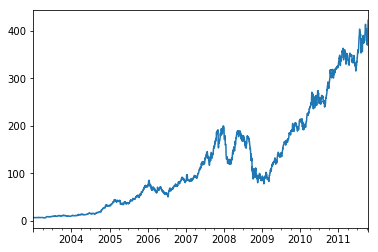

In [176]:
close_px['AAPL'].plot()

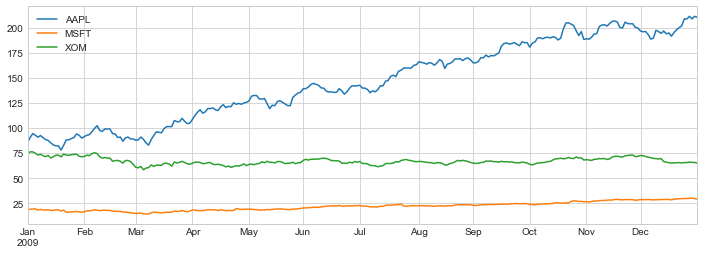

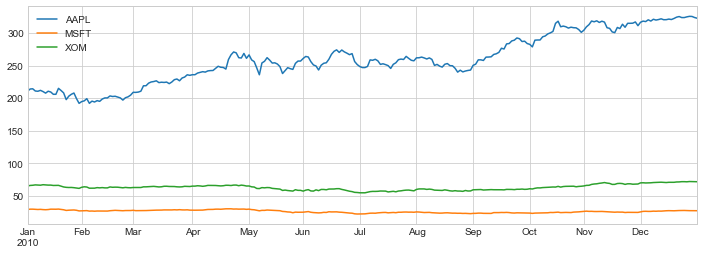

In [179]:
import matplotlib
matplotlib.style.use('seaborn-whitegrid')
plt.rc('figure', figsize=(12, 4))
close_px.loc['2009'].plot();
close_px.loc['2010'].plot();

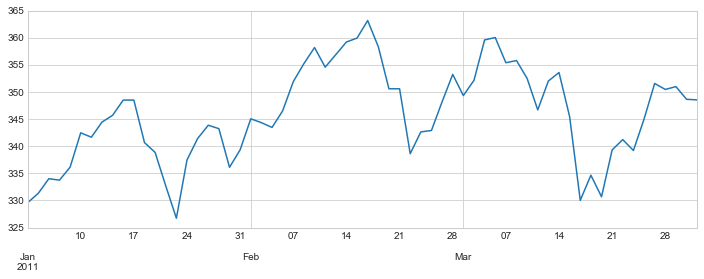

In [181]:
close_px['AAPL'].loc['01-2011':'03-2011'].plot()

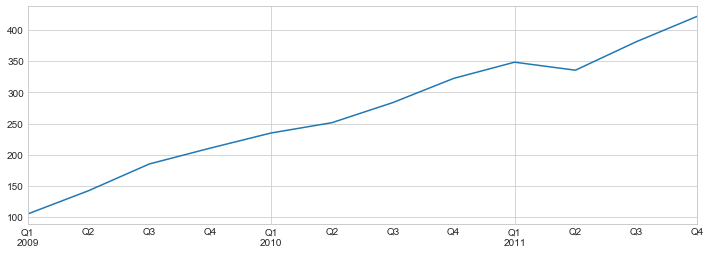

In [185]:
# 분기별 평균 주가 
appl_q = close_px['AAPL'].resample('Q-DEC').ffill()
appl_q.loc['2009':].plot()

## 10.8 이동창 기능(Moving window functions)
- 범위를 가지고 이동하면서 계산